# K-means base algo

author: Micael Veríssimo de Araújo (micael.verissimo@lps.ufrj.br)

In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

from sklearn import datasets
from scipy.spatial import Voronoi, voronoi_plot_2d

class base_kmeans(object):
    def __init__(self, n_clusters, seed=None):
        self.seed       = seed
        self.n_clusters = n_clusters

        np.random.seed(self.seed)
        
    def get_n_clusters(self):
        return self.n_clusters
    
    def get_centroids(self):
        return self.centroids
    
    def get_first_centroids(self):
        return self.first_centroids
    
    def get_n_dim(self):
        return self.n_dim
    
    def fit(self, X_data, breg_div='euclidean', n_iter=10, tol=1e-3):
        # begin: initialize the centroids
        self.X          = X_data
        self.breg_div   = breg_div
        self.n_iter     = n_iter
        self.n_dim      = X_data.shape[1]
        self.centroids  = np.random.uniform(low=np.min(self.X, axis=0), high=np.max(self.X,axis=0),
                                            size=(self.n_clusters, self.n_dim))
        #self.F_in       = np.zeros(self.n_clusters)
        self.labels     = None
        print('Begin K-means using %s divergence... ' %(self.breg_div))
        self.first_centroids = self.centroids
        for i_iter in range(n_iter):
            new_centroids = np.zeros_like(self.centroids)
            print('Iteraction: %i' %(i_iter+1))
            if self.breg_div == 'itakura-saito':
                dist = distance.cdist(self.X, self.centroids,
                                      metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum()) 
            elif self.breg_div == 'exp':
                dist = distance.cdist(self.X, self.centroids,
                                      metric=lambda u, v: (np.exp(u)-np.exp(v)-(u-v)*np.exp(v)).sum())
            elif self.breg_div == 'gen_kl':
                dist = distance.cdist(self.X, self.centroids,
                                      metric=lambda u, v: ((u*np.log(u/v)).sum()-(u-v).sum()).sum())
            else:
                dist = distance.cdist(self.X, self.centroids, metric=self.breg_div)
                
            # Classification Step
            self.labels = np.argmin(dist, axis=1)
            # Renewal Step
            for icluster in range(self.centroids.shape[0]):
                if self.X[self.labels==icluster].shape[0] != 0:
                    new_centroids[icluster] = np.mean(self.X[self.labels==icluster], axis=0)
                else:
                    new_centroids[icluster] = self.centroids[icluster]
            self.centroids = new_centroids

In [2]:
iris = datasets.load_iris()
y=iris['target']

In [3]:
sample = iris['data']
sample.shape

(150, 4)

In [4]:
kmeans=base_kmeans(n_clusters=3)
kmeans.fit(sample, n_iter=10, breg_div='itakura-saito')

Begin K-means using itakura-saito divergence... 
Iteraction: 1
Iteraction: 2
Iteraction: 3
Iteraction: 4
Iteraction: 5
Iteraction: 6
Iteraction: 7
Iteraction: 8
Iteraction: 9
Iteraction: 10


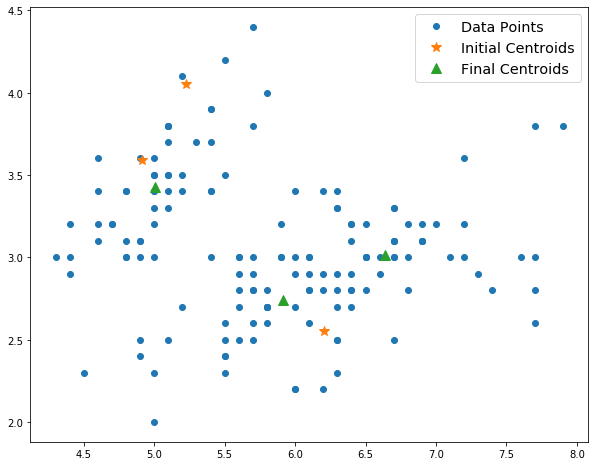

In [5]:
plt.figure(figsize=(10,8))
plt.plot(sample[:,0], sample[:,1], 'o', label='Data Points')
plt.plot(kmeans.get_first_centroids()[:,0], kmeans.get_first_centroids()[:,1], '*',
         markersize=10, label='Initial Centroids')
plt.plot(kmeans.get_centroids()[:,0], kmeans.get_centroids()[:,1], '^',
         markersize=10, label='Final Centroids')
plt.legend(loc='best', fontsize='x-large')
plt.show()

In [6]:
centers = kmeans.get_centroids()

In [7]:
proj_2d = centers[:,:2]

In [8]:
# Get the Voronoi diagrams
vor = Voronoi(proj_2d)

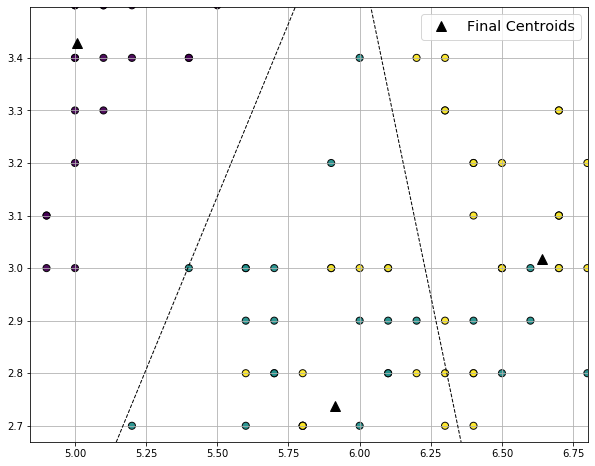

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
# Draw voronoi
voronoi_plot_2d(vor, ax=axes, show_vertices=True)
# Draw data using target to colorize them
axes.scatter(sample[:, 0], sample[:, 1], c=y, cmap='viridis',
             edgecolor='k', s=50, alpha=.95)
# Draw the centroids
axes.plot(centers[:,0], centers[:,1], '^', c='black', markersize=10, label='Final Centroids')
plt.grid()
plt.legend(loc='best', fontsize='x-large')
plt.show()